<a href="https://colab.research.google.com/github/bvanitsthian/photocircle_nlp/blob/main/circles_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('stopwords')

In [ ]:
pip install wordcloud

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/PhotoCircle/photocircle.csv')

In [5]:
data.head()

,circle_uuid,user_uuid,media_added_count_x,title,media_count,has_greek_words,real_estate_keywords,is_real_estate,solar_keywords,is_solar,...,is_location,display_name,email_domain,active_count_in_last_30_days,media_added_count_y,first_name,num_female,num_male,female_pct,is_student
0,00005962-836d-d551-c07b-5c2040500002,00000000-575c-c42a-d551-c018b1942652,96,Georgia Jean Williams,160.0,False,[],False,[],False,...,False,Darwin Williams,stthomas.edu,6.0,15.0,Darwin,83.0,24680.0,0.34,True
1,00005bfc-e475-d551-c026-3d658eab0002,4d4f4f68-feff-4490-bd45-ae90ba4acdbf,6,Tri Delta,12235.0,True,[],False,[],False,...,False,tara ghimenti,gmail.com,0.0,0.0,tara,0.0,0.0,50.00,False
2,55a82813-15c0-4faf-897d-d04803036af0,c31e9b29-bf13-4493-a017-54d531d51d7b,31,Vegas 2022,31.0,False,[],False,[],False,...,False,Brenda Yorks,privaterelay.appleid.com,0.0,0.0,Brenda,607096.0,2121.0,99.65,False
3,0000594a-f3f4-d551-c011-88e3b4ad0002,00000000-594a-f5ce-d551-c01188e3c8cb,8,WALK,587.0,False,[],False,[],False,...,False,Rebekah Farnham,gmail.com,0.0,0.0,Rebekah,73511.0,119.0,99.84,False
4,fc66e54c-8e12-4387-9579-be35b6f3d8ab,eebe45c6-66fb-4e86-9f39-c55f55d98c95,72,❤ Eric Hazen ❤,466.0,False,[],False,[],False,...,False,Cindy,live.com,0.0,0.0,Cindy,256399.0,770.0,99.70,False


In [18]:
data['title'] = data['title'].str.lower()

In [19]:
grouped_data = data.groupby('circle_uuid')

In [20]:
unique_title = grouped_data['title']

In [21]:
len(unique_title)

2042587

In [22]:
unique_title.head()

0                           georgia jean williams
1                                       tri delta
2                                      vegas 2022
3                                            walk
4                                 ❤ eric hazen  ❤
                            ...                  
10578714                         six flags 5/2021
10578718                          santa cruz 7/13
10578725                                tutorials
10578726    247 days old monday mahara 07/11/2022
10578740                            daniel bowers
Name: title, Length: 5921872, dtype: object

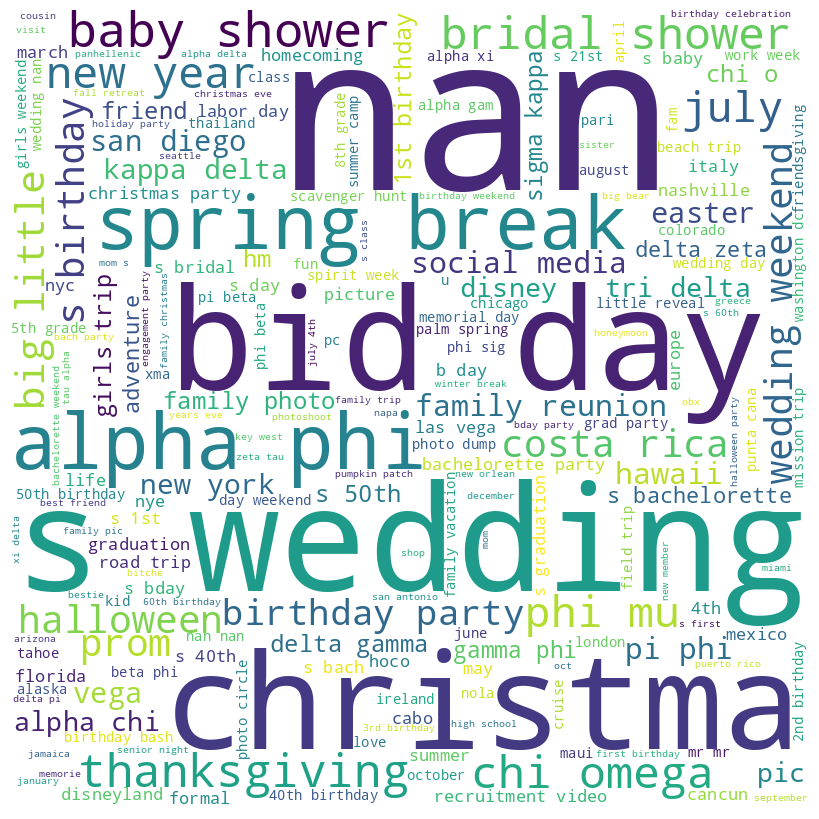

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data['title'].astype(str))
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()